# ClassWoorks

In [712]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time

## Genreating random data

In [713]:
x = np.random.randint(0, 200, (100))
y = 3*np.array([x[i] + 30*np.random.uniform(-1,1) for i in range(len(x))]) 

In [714]:
n = int(np.sqrt(len(x)))

In [715]:
# # x.reshape(len(x), 1)
# xr = x.copy()
# xr.resize(n, int(len(x)/n))
# x[2]**x[2]

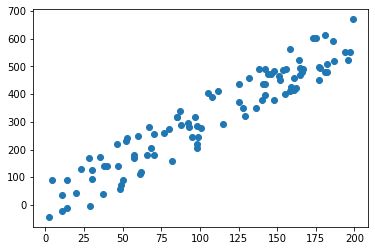

In [716]:
plt.scatter(x, y)

## Using sklearn for lenier regersion

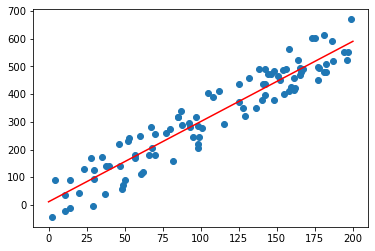

w:  2.895442162585338
b:  11.49447448383927


In [717]:
model = LinearRegression(fit_intercept=True)
xs = x.copy()
model.fit(xs[:, np.newaxis], y)
xfit = np.linspace(0, 200, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit, color = 'red')

plt.show()
print('w: ',model.coef_[0])
print('b: ',model.intercept_ )

# batch GD

In [718]:
# o = np.random.randint(0,10, (5,1))
# print(o)
# o.shape[1]

In [719]:
def gd(x, y, alpha, iteration = 1000, wb = None, bb = None, ep = 0.001):
    # parameters
    if wb == None:
        w = np.random.random()
        b = np.random.random()
    else:
        w = wb
        b = bb
       
    n = len(x)

    # training
     
    la =  sum([(w*x[j] + b - y[j])**2/n for j in range(n)])/n
    
    for i in range(iteration):
        
        l = 0
        dw, db = 0, 0
        for j in range(n):
            
            
            dw += 2*x[j]*(w*x[j] + b - y[j])
            db += 2*(w*x[j] + b - y[j])
            
        w -= alpha*dw/n
        b -= alpha*db/n
        l =  sum([(w*x[j] + b - y[j])**2 for j in range(n)])/n
        
#         print('w: ', dw)
#         print('b: ', db)
        
#         print('iteration:'+ str(i)+', Loss:'+str(l -la))
        if abs(la - l) <= ep:
            break
        la = l
#     print('final iteration:'+ str(i)+', cost:'+str(l -la))
    return w, b
    

w:  2.972552795422916
b:  0.9395212647018082


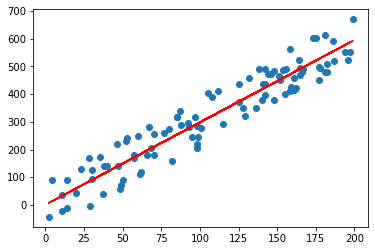

In [720]:
w0 = np.random.random()
b0 = np.random.random()
w, b = gd(x, y, alpha = 0.00001, wb =w0, bb=b0, ep = 1e-7)
plt.scatter(x, y)
plt.plot(x, w*x + b, 'r')

print('w: ', w)
print('b: ', b)

# Mini batch

In [721]:
# xr = y.copy()
# bn = int(len(x)/2)
# xr.resize(2, bn)
# xr

In [722]:
def mini_gd(X: np.array, Y: np.array, bn, alpha, b_iter = 1000):
    
    #parameters
    wt = np.random.random()
    bt = np.random.random()
    print('intitial (w, b)=', (wt, bt))
    # resizing to mini batches
    blen = int(len(X)/bn) # bathch leangth
    x = X.copy()
    x.resize(bn, blen)
    y = Y.copy()
    y.resize(bn, blen)
    for i in range(b_iter):
        for j in range(bn):
            
            w, b = gd(x[j],y[j], alpha, wb = wt, bb = bt, iteration = 1)
#             print(w, b)
            wt = w
            bt = b
    return wt, bt
    
    
    
    

intitial (w, b)= (0.08018891398972305, 0.4391277289310228)
w:  2.8970651400400755
b:  1.371472294223732


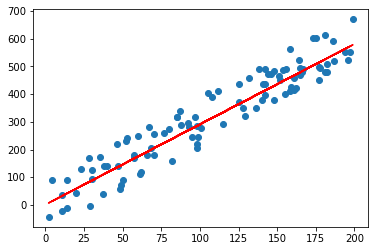

In [723]:
w, b = mini_gd(x, y, 20, alpha = 0.00001)
plt.scatter(x, y)
plt.plot(x, w*x + b, 'r')
print('w: ', w)
print('b: ', b)

# SGD

It is same as keeping the batch leangth as 1 and totel number of batches as the size of training data points in mini bathch funtion

intitial (w, b)= (0.23783627620852976, 0.34434984676124214)
w:  2.7501648436318273
b:  3.350189458093767


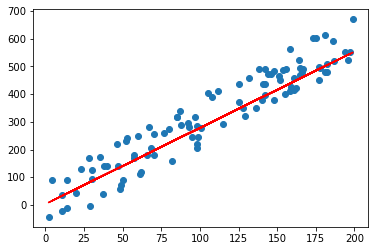

In [724]:
w, b = mini_gd(x, y, len(x), alpha = 0.00001)
plt.scatter(x, y)
plt.plot(x, w*x + b, 'r')
print('w: ', w)
print('b: ', b)

In [725]:
type(y)

numpy.ndarray

In [726]:
def b(a, b = 2):
    def d(x):
        return b*x
    print(d(a))

b(2)

4


In [727]:
#     # loss func
    
#     def Loss(xi, yi):
# #         print(w, b)
#         l = (w*xi + b - yi)**2/n
#         return l
#     # do w
#     def dow(xi, yi):
#         return 2*xi*(w*xi + b - yi)/n
#     # do b
#     def dob(xi, yi):
#         return 2*(w*xi + b - yi)/n